In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [2]:
#монтируем с гугл диска чтоб не закачивать постоянно
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_bp=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/X_bp.xlsx', index_col=0)
df_nup=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/X_nup.xlsx', index_col=0)

In [4]:
df = df_bp.merge(df_nup, left_index=True,right_index=True, how='inner')

### Знакомство с данными

In [5]:
df.head(10)

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0.0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0,0.0,4.0,57.0
1.0,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,0.0,4.0,60.0
2.0,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0,0.0,4.0,70.0
3.0,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,0.0,5.0,47.0
4.0,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0.0,5.0,57.0
5.0,2.767918,2000.0,748.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0.0,5.0,60.0
6.0,2.569620,1910.0,807.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0.0,5.0,70.0
7.0,2.561475,1900.0,535.000000,111.86,22.267857,284.615385,380.0,75.0,1800.0,120.0,0.0,7.0,47.0
8.0,3.557018,1930.0,889.000000,129.00,21.250000,300.000000,380.0,75.0,1800.0,120.0,0.0,7.0,57.0
9.0,3.532338,2100.0,1421.000000,129.00,21.250000,300.000000,1010.0,78.0,2000.0,300.0,0.0,7.0,60.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1023 entries, 0.0 to 1022.0
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   float64
 11  Шаг нашивки

посмотрели  датасет, всё корректно, пропусков нет, проверим на дубликаты

In [7]:
df.duplicated().sum()

0

посмотрим описательную статистику

In [8]:
df.describe()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000
mean,2.930366,1975.734888,739.923233,110.570769,22.244390,285.882151,482.731833,73.328571,2466.922843,218.423144,44.252199,6.899222,57.153929
std,0.913222,73.729231,330.231581,28.295911,2.406301,40.943260,281.314690,3.118983,485.628006,59.735931,45.015793,2.563467,12.350969
min,0.389403,1731.764635,2.436909,17.740275,14.254985,100.000000,0.603740,64.054061,1036.856605,33.803026,0.000000,0.000000,0.000000
25%,2.317887,1924.155467,500.047452,92.443497,20.608034,259.066528,266.816645,71.245018,2135.850448,179.627520,0.000000,5.080033,49.799212
50%,2.906878,1977.621657,739.664328,110.564840,22.230744,285.896812,451.864365,73.268805,2459.524526,219.198882,0.000000,6.916144,57.341920
75%,3.552660,2021.374375,961.812526,129.730366,23.961934,313.002106,693.225017,75.356612,2767.193119,257.481724,90.000000,8.586293,64.944961
max,5.591742,2207.773481,1911.536477,198.953207,33.000000,413.273418,1399.542362,82.682051,3848.436732,414.590628,90.000000,14.440522,103.988901


отсутсвуют пропуски везде, дубликатов тож нет

### 2. Визуализация
проанализируем  датасет, построим гистограммы

In [9]:
df.columns

Index(['Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2',
       'Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки'],
      dtype='object')

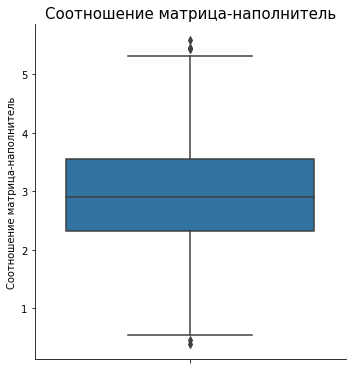

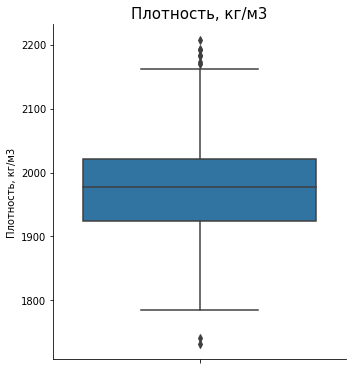

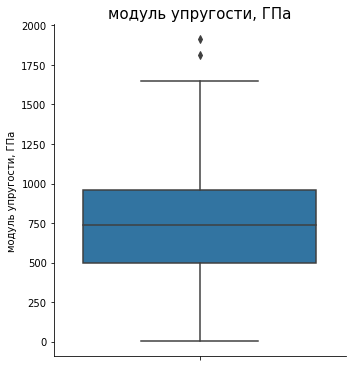

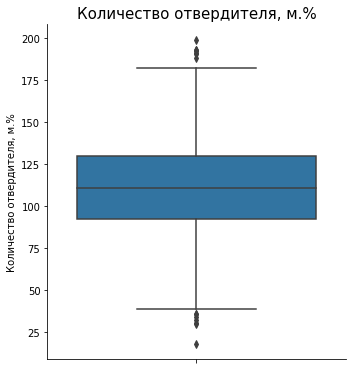

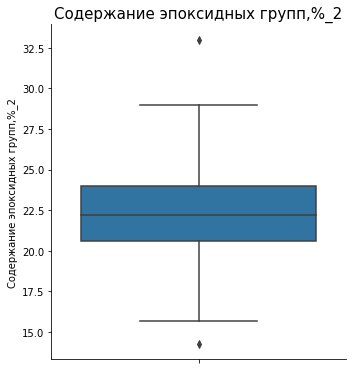

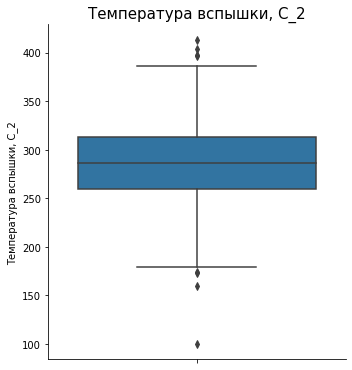

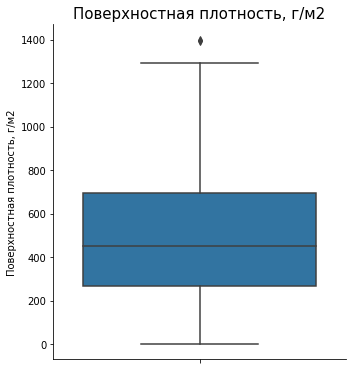

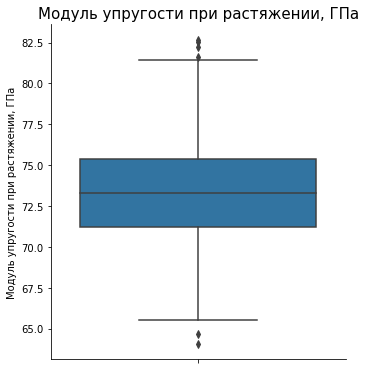

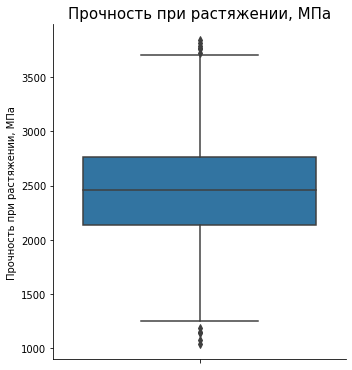

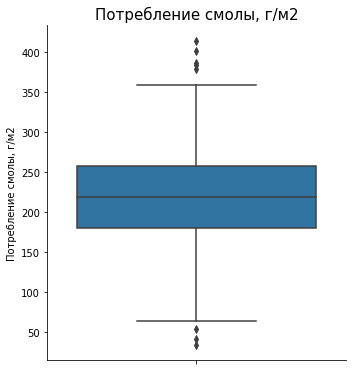

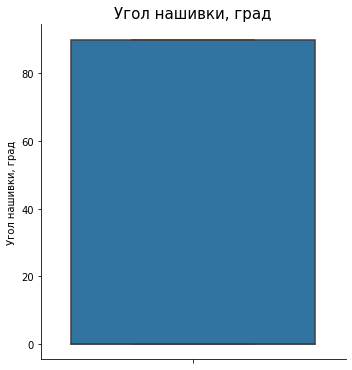

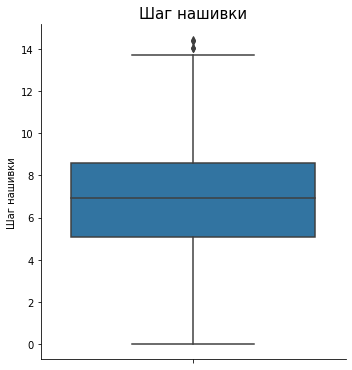

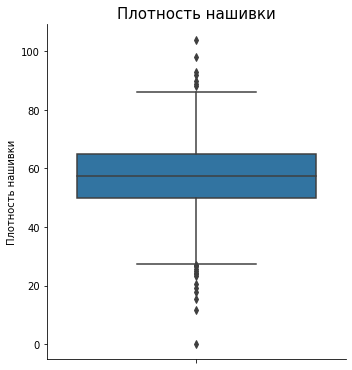

In [10]:
for col in df.columns: 
    sns.catplot(y=col, data=df, kind='box')
    plt.title(col, fontsize=15)


видно, что кое какие выбросы есть

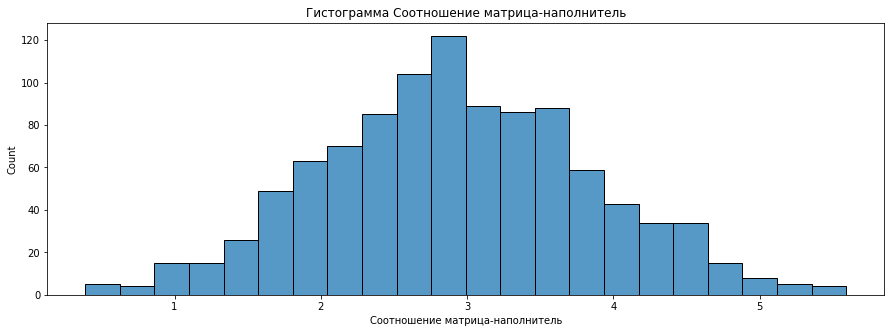

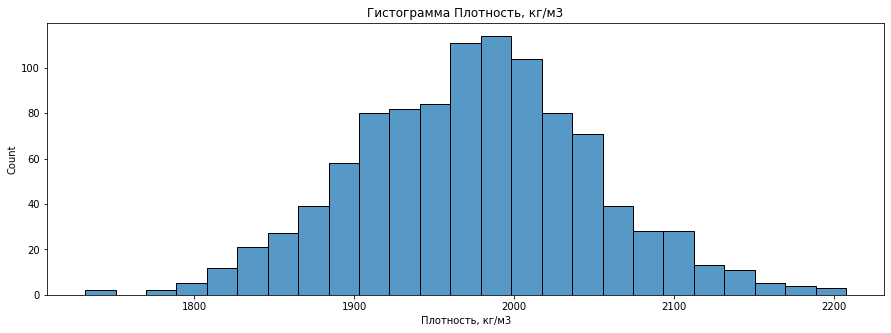

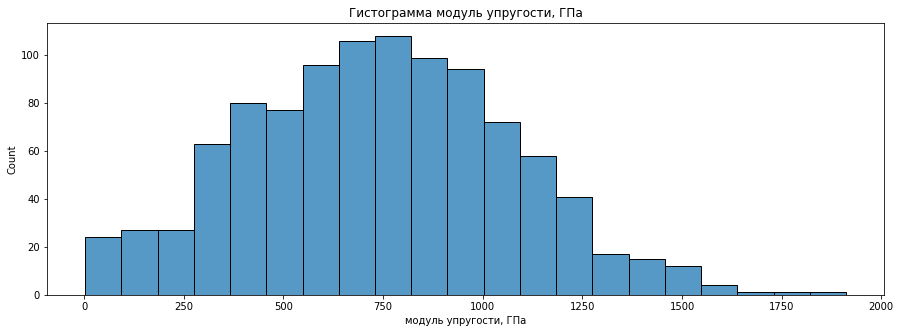

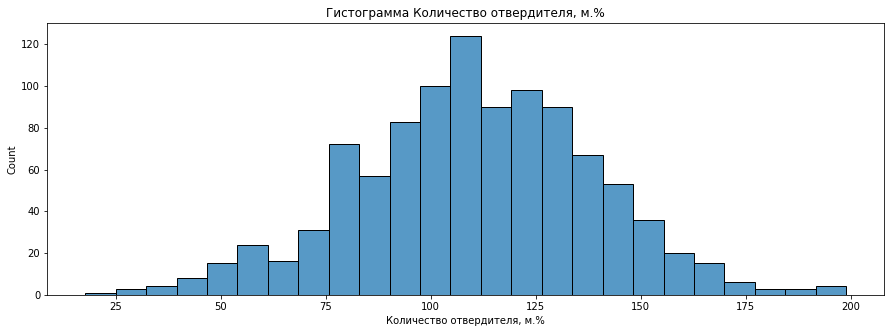

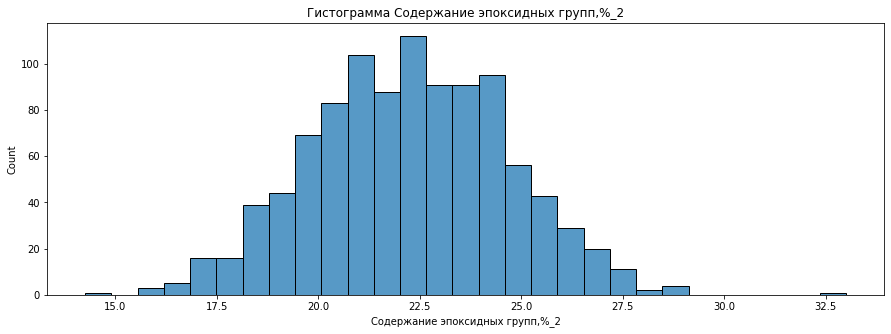

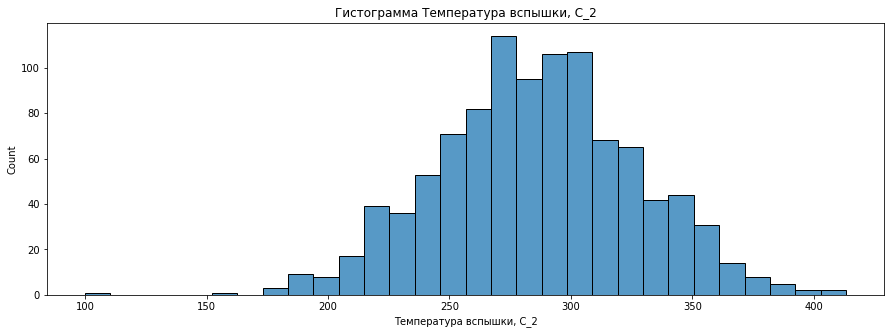

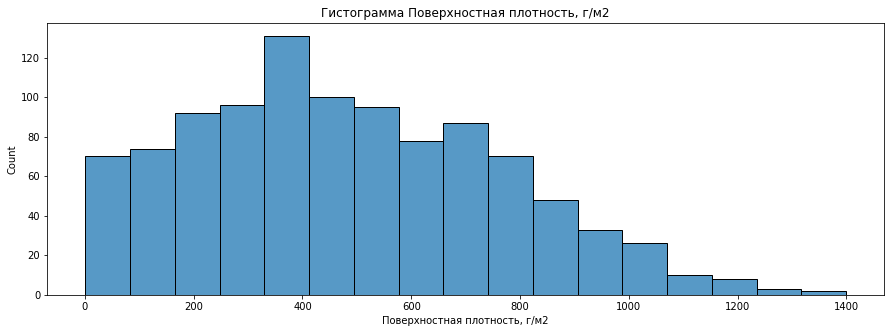

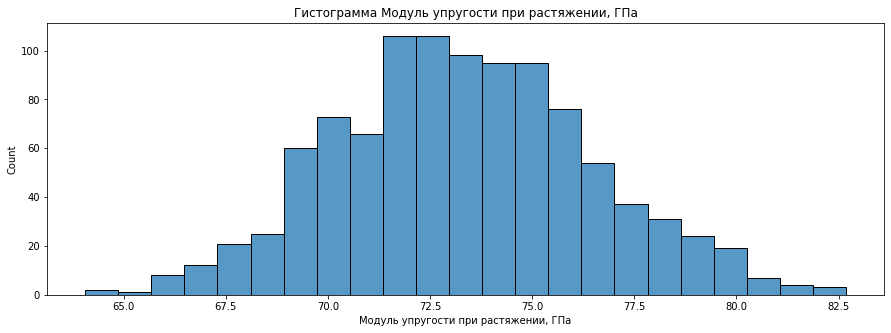

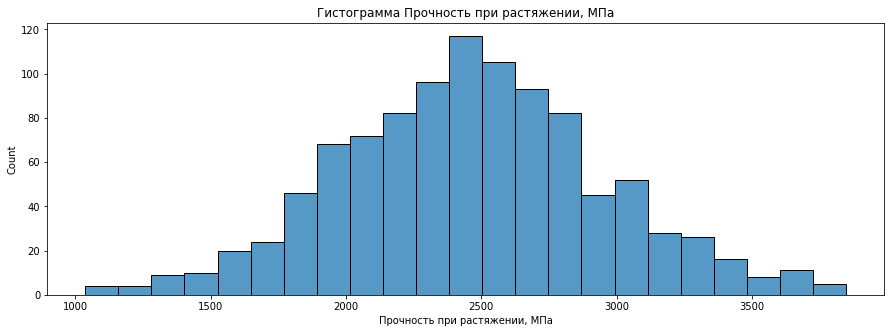

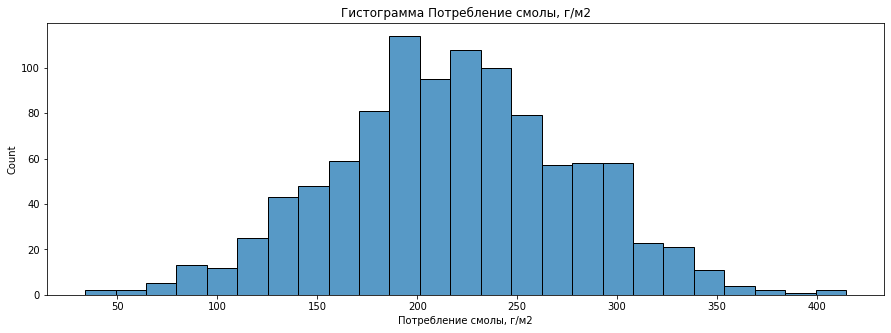

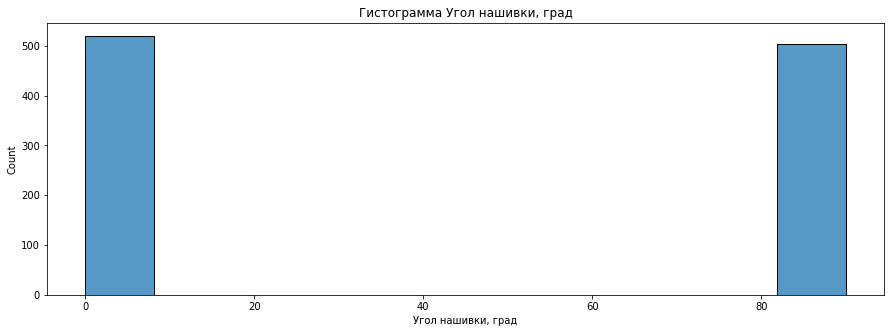

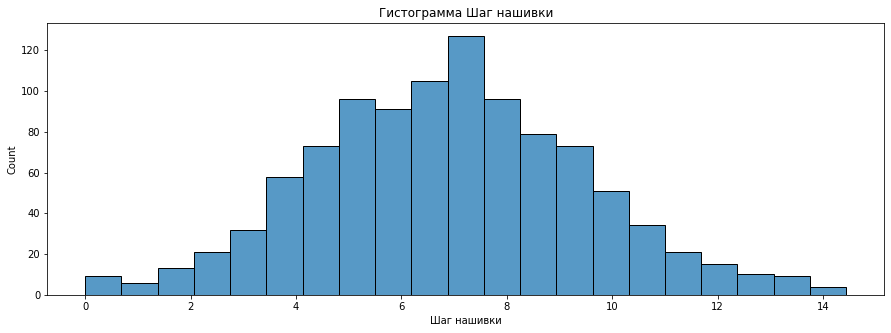

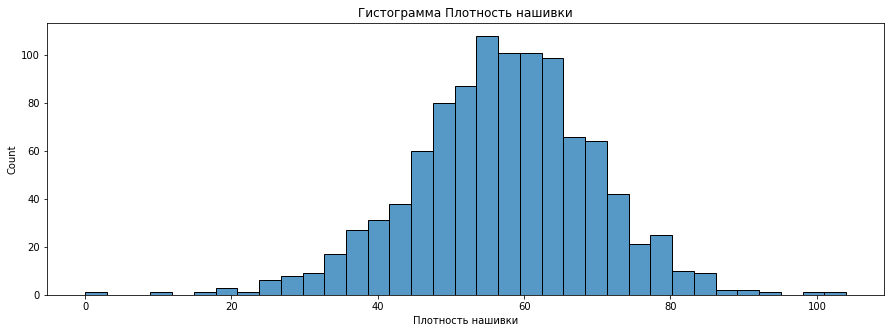

In [11]:
for col in df.columns: 
  plt.figure(figsize=(15, 5))
  plt.title("Гистограмма "+str(col))
  sns.histplot(data=df[col])
  plt.show()

видно, что данные распределены в основном нормально, только с углом нашивки что-то не то

построим парные графики

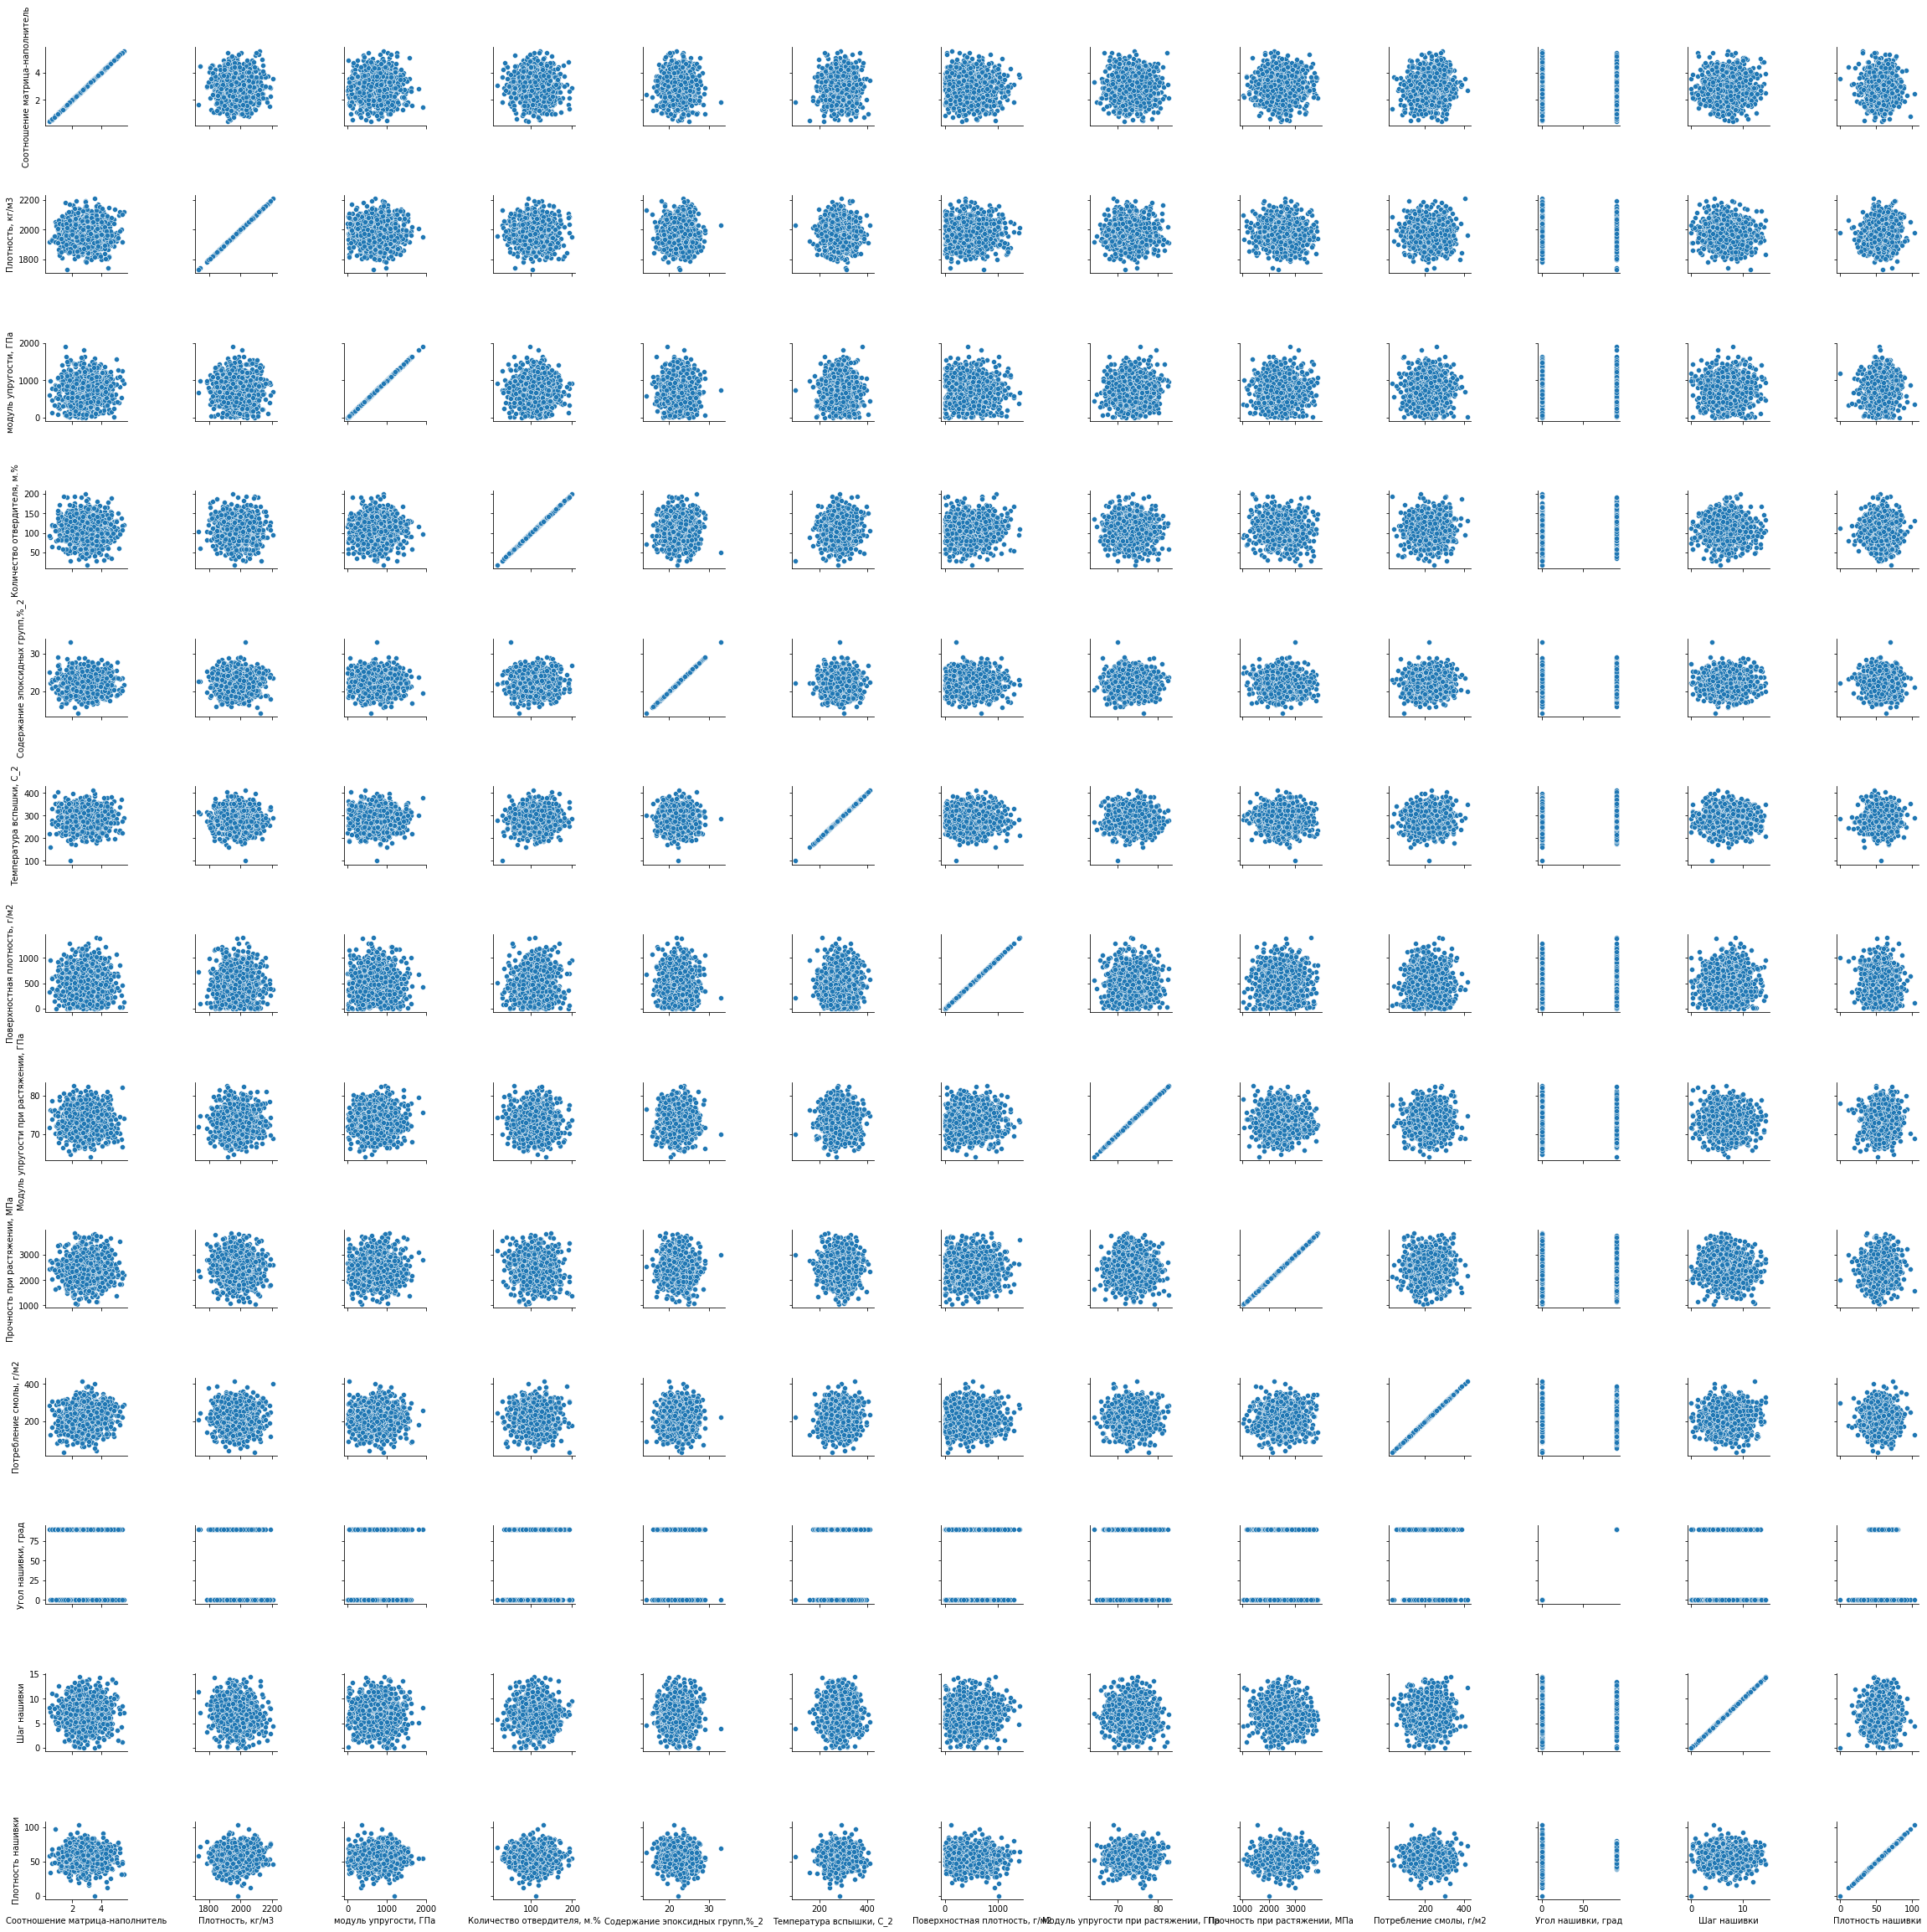

In [12]:
cols = df.columns
g = sns.PairGrid(df[cols])
g.map(sns.scatterplot)

не особо информативно получилось

Проверим корреляции признаков

In [13]:
corr = df.corr()

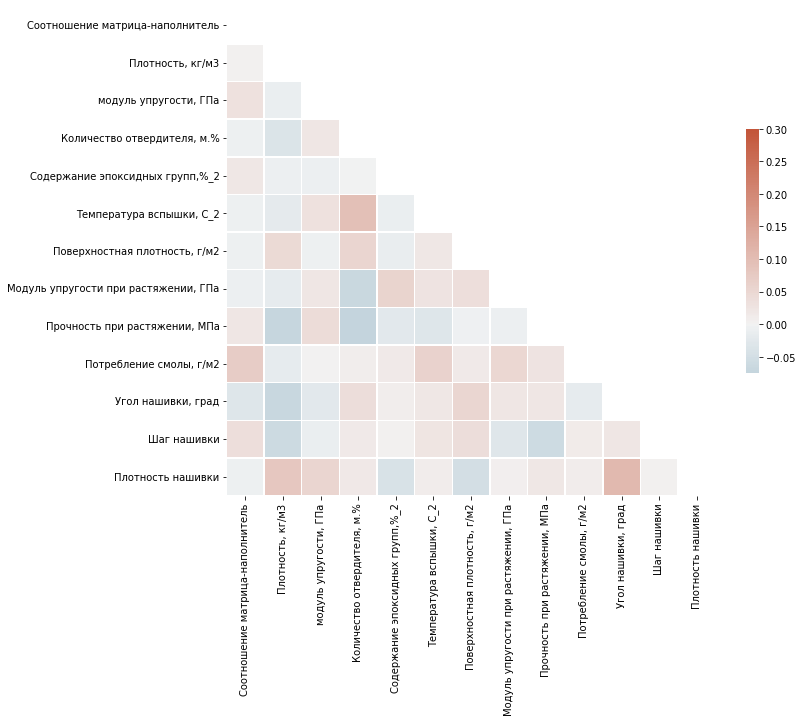

In [14]:
mask = np.triu(np.ones_like(corr, dtype=bool))

# Создаем полотно для отображения большого графика
f, ax = plt.subplots(figsize=(11, 9))

# Создаем цветовую политру
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Визуализируем данные кореляции 
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

видно пары, количество отвердителя - температура вспышки, плотность нашивки - угол нашивки.

In [ ]:
['Содержание эпоксидных групп,%_2',  'Потребление смолы, г/м2']

# Предобработка данных

In [15]:
#Составим список признаков, у которых более 95% строк содержат одно и то же значение.
num_rows = len(df.index)
low_information_cols = [] #

for col in df.columns:
    cnts = df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

Вывод - малоинформативные признаки отсутствуют!

очистим данные от выбросов, выбросы заменим nan 

In [16]:
for x in df.columns:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan

проверим какое количество выбросов по каждому столбцу

In [17]:
df.isnull().sum()

Соотношение матрица-наполнитель          6
Плотность, кг/м3                         9
модуль упругости, ГПа                    2
Количество отвердителя, м.%             14
Содержание эпоксидных групп,%_2          2
Температура вспышки, С_2                 8
Поверхностная плотность, г/м2            2
Модуль упругости при растяжении, ГПа     6
Прочность при растяжении, МПа           11
Потребление смолы, г/м2                  8
Угол нашивки, град                       0
Шаг нашивки                              4
Плотность нашивки                       21
dtype: int64

количество выбросов довольно мало, можно просто удалить эти строки

In [18]:
df = df.dropna(axis = 0)

посмотрим опять на боксплоты

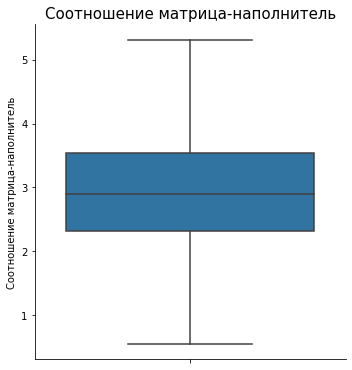

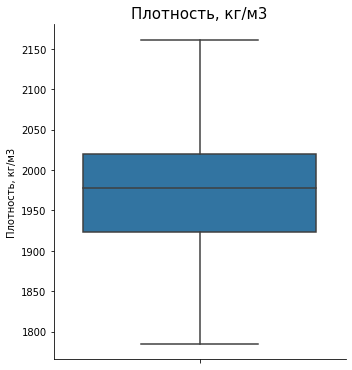

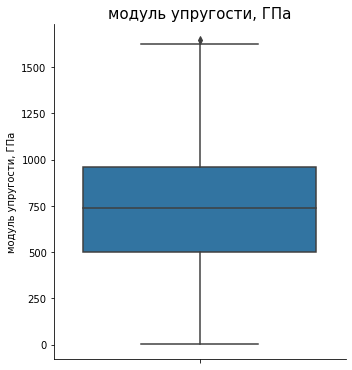

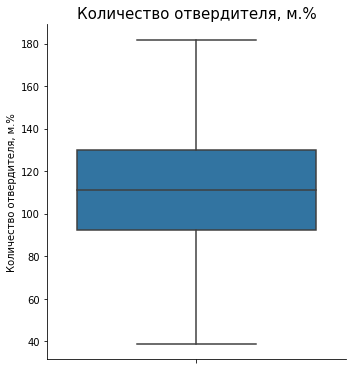

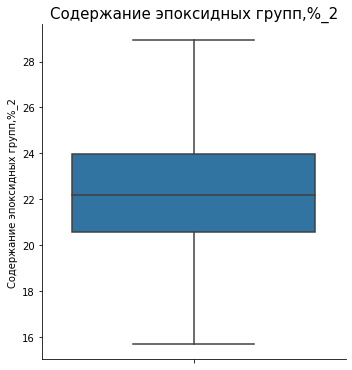

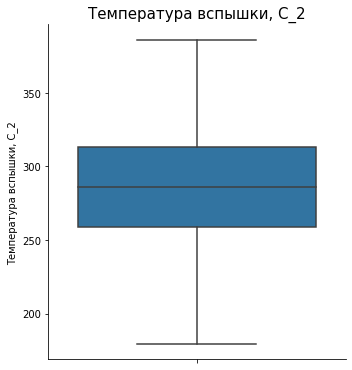

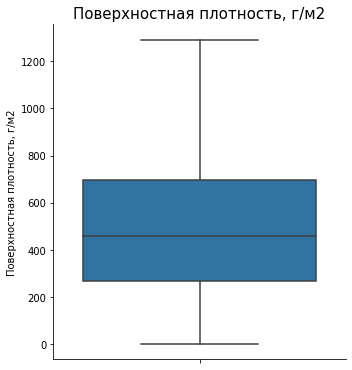

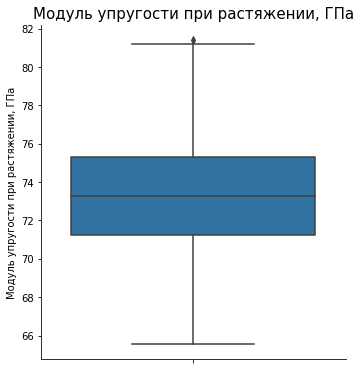

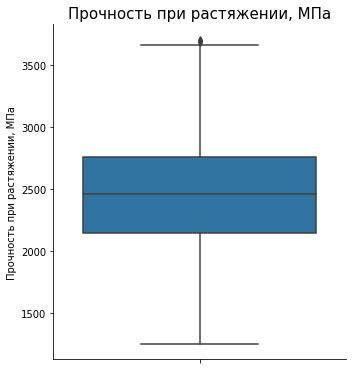

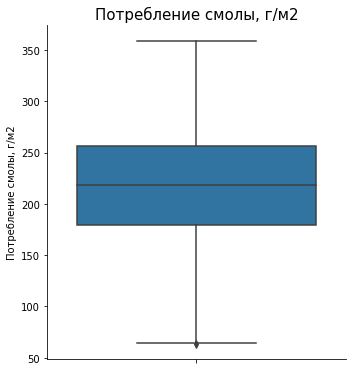

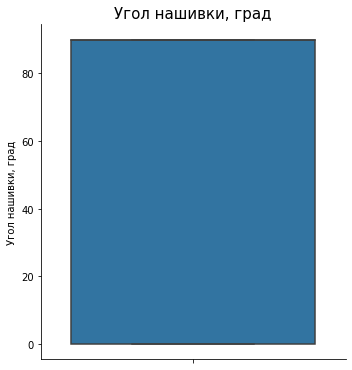

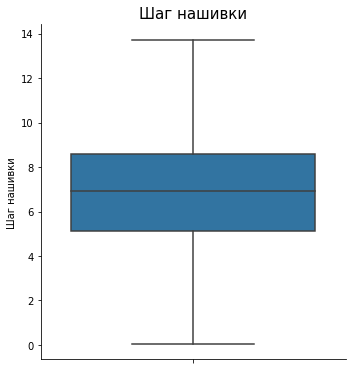

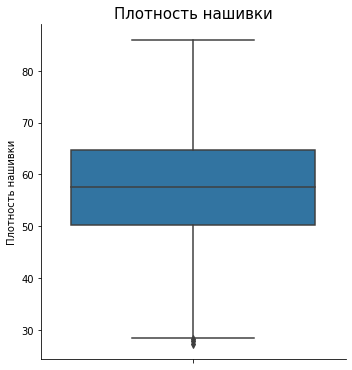

In [19]:
for col in df.columns: 
    sns.catplot(y=col, data=df, kind='box')
    plt.title(col, fontsize=15)

всё хорошо, от шумов избавились

теперь нормализуем значения, очень большой разброс везде

In [20]:
scaler = MinMaxScaler()

norm_df=pd.DataFrame(scaler.fit_transform(df),
            columns=df.columns, index=df.index) 



In [21]:
norm_df.describe()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000
mean,0.498933,0.502695,0.446764,0.504664,0.491216,0.516059,0.373733,0.488647,0.495706,0.521141,0.511752,0.502232,0.513776
std,0.187489,0.187779,0.199583,0.188865,0.180620,0.190624,0.217078,0.191466,0.188915,0.195781,0.500129,0.183258,0.191342
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.372274,0.368517,0.301243,0.376190,0.367716,0.386128,0.205619,0.359024,0.365149,0.392067,0.000000,0.372211,0.390482
50%,0.494538,0.511229,0.447061,0.506040,0.489382,0.515980,0.354161,0.485754,0.491825,0.523766,1.000000,0.504258,0.516029
75%,0.629204,0.624999,0.580446,0.637978,0.623410,0.646450,0.538683,0.615077,0.612874,0.652447,1.000000,0.624604,0.638842
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


нормализация выполнена.

# прогноз модуля упругости при растяжени

In [104]:
#target = norm_df[['Модуль упругости при растяжении, ГПа','Прочность при растяжении, МПа']]
#train = norm_df.drop(['Модуль упругости при растяжении, ГПа','Прочность при растяжении, МПа'], axis=1)
target = norm_df['Модуль упругости при растяжении, ГПа']
train = norm_df[['Содержание эпоксидных групп,%_2',  'Потребление смолы, г/м2']]
#train = norm_df.drop(['Модуль упругости при растяжении, ГПа'], axis=1)
#target = df['Модуль упругости при растяжении, ГПа']
#train = df.drop(['Модуль упругости при растяжении, ГПа'], axis=1)

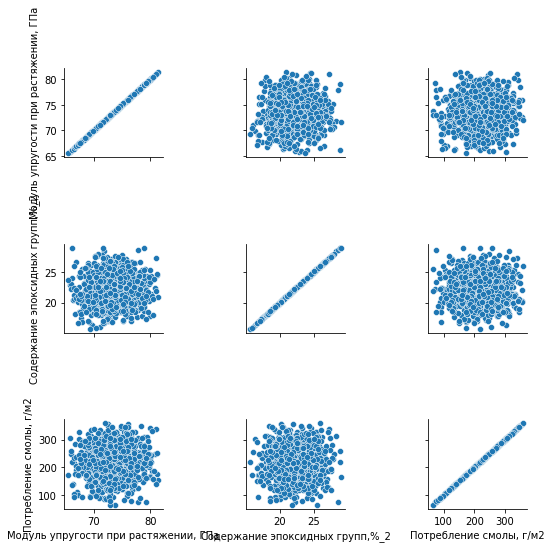

In [110]:
cols=['Модуль упругости при растяжении, ГПа','Содержание эпоксидных групп,%_2',  'Потребление смолы, г/м2']
g = sns.PairGrid(df[cols])
g.map(sns.scatterplot)

In [105]:
Xtrn, Xtest, Ytrn, Ytest = train_test_split(train, target, test_size=0.3)

In [115]:
Xtrn

,"Содержание эпоксидных групп,%_2","Потребление смолы, г/м2"
358.0,0.281285,0.308543
147.0,0.486678,0.404555
243.0,0.501438,0.509367
939.0,0.370427,0.609910
611.0,0.284092,0.366758
...,...,...
459.0,0.785435,0.924142
365.0,0.440528,0.654989
38.0,0.587611,0.420412
710.0,0.561244,0.390837


In [107]:
lin_reg_mod = LinearRegression()
lin_reg_mod.fit(Xtrn, Ytrn)
pred = lin_reg_mod.predict(Xtest)

In [108]:
test_set_rmse = (np.sqrt(mean_squared_error(Ytest, pred)))

test_set_r2 = r2_score(Ytest, pred)

In [109]:
print(test_set_rmse)
print(test_set_r2)

0.18687762474457809
-0.01123803692631875


Вывод - линейной зависимости нету! надо использовать другие алгоритмы

In [74]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(Xtrn)

In [76]:
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly,Ytrn)

LinearRegression()

In [78]:
X_p = poly_reg.fit_transform(Xtest)
pred = lin_reg2.predict(X_p)

In [79]:
test_set_rmse = (np.sqrt(mean_squared_error(Ytest, pred)))

test_set_r2 = r2_score(Ytest, pred)

In [80]:
print(test_set_rmse)
print(test_set_r2)

0.21001976154954005
-0.09230188902332115


In [87]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 1)
XPCAreduced = pca.fit_transform(np.transpose(Xtrn))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  FutureWarning,


In [88]:
XPCAreduced

array([[-13562.84657415],
       [ 36573.41786861],
       [  5128.73278418],
       [-10851.62434124],
       [-13072.0501902 ],
       [ -6407.77088373],
       [ -1563.88976283],
       [ 50049.7183966 ],
       [ -8124.91396903],
       [-12537.01400131],
       [-13460.70438555],
       [-12171.05494134]])

In [89]:
lin_reg_mod = LinearRegression()
lin_reg_mod.fit(XPCAreduced, Ytrn)
#pred = lin_reg_mod.predict(Xtest)

ValueError: ignored

Xtrn, Xtest, Ytrn, Ytest = train_test_split(train, target, test_size=0.3)

In [95]:
slr = LinearRegression()

slr.fit(Xtrn, Ytrn)
y_train_pred = slr.predict(Xtrn)
y_test_pred = slr.predict(Xtest)

In [97]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score

print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(Ytrn, y_train_pred),
        mean_squared_error(Ytest, y_test_pred)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(Ytrn, y_train_pred),
        r2_score(Ytest, y_test_pred)))

MSE train: 0.035, test: 0.039
R^2 train: 0.013, test: 0.004


In [111]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=2000, max_depth=18)
model.fit(Xtrn, Ytrn)
y_pred_forest = model.predict(Xtest)
r2_score(Ytest, y_pred_forest)

-0.17857190702959613

Вывод - ни случайный лес ни линейная регрессия не справились, следовательно имеющихся данных недостаточно.
изучим теорию.

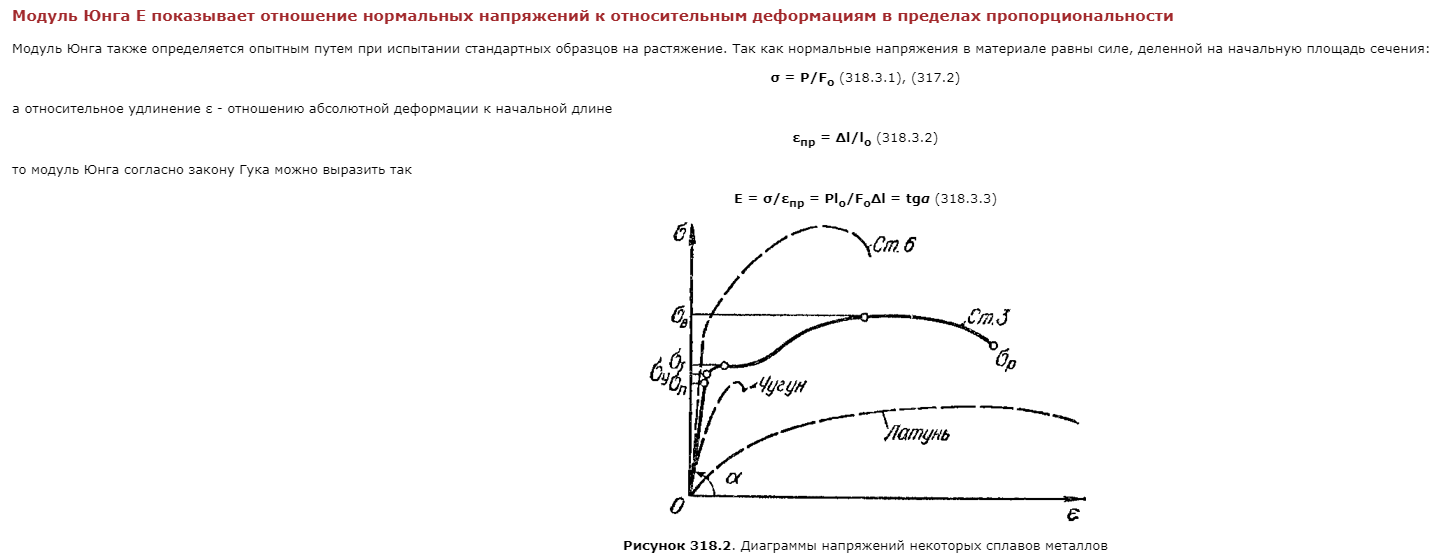

В основном, модуль упругости зависит от материала.

# Прогноз прочности при растяжении

In [116]:
target = norm_df['Прочность при растяжении, МПа']
train = norm_df.drop(['Прочность при растяжении, МПа'], axis=1)

In [117]:
Xtrn, Xtest, Ytrn, Ytest = train_test_split(train, target, test_size=0.3)

In [118]:
slr = LinearRegression()

slr.fit(Xtrn, Ytrn)
y_train_pred = slr.predict(Xtrn)
y_test_pred = slr.predict(Xtest)

In [119]:
print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(Ytrn, y_train_pred),
        mean_squared_error(Ytest, y_test_pred)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(Ytrn, y_train_pred),
        r2_score(Ytest, y_test_pred)))

MSE train: 0.035, test: 0.035
R^2 train: 0.020, test: -0.003


In [120]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=2000, max_depth=18)
model.fit(Xtrn, Ytrn)
y_pred_forest = model.predict(Xtest)
r2_score(Ytest, y_pred_forest)

-0.02684375546512552

Прочность при растяжении Rm (такж разрывная прочность) представляет собой характеристику материала для оценки прочностных свойств. Прочность при растяжении (англ.: tensile strength) обозначает максимальное механическое растягивающее напряжение, с которым можно нагружать образец. При превышении прочности при растяжении материал разрушается: приложение усилия снижается, пока образец, наконец, не порвется. Разумеется, на образце возникает пластичная (т.е. остаточная) деформация еще до достижения прочности при растяжении.

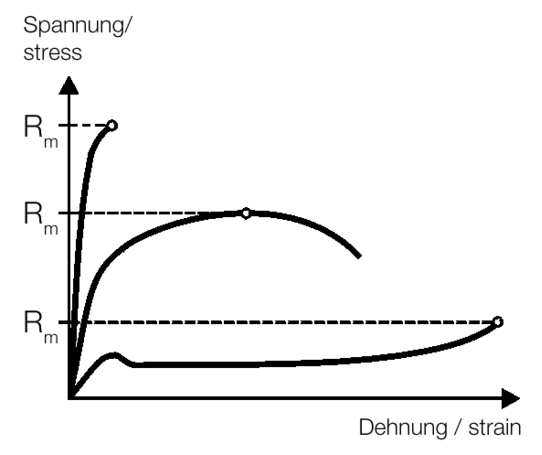

и мы видим, что одному значению х - прочность при растяжении, могут соответствовать множество материалов в различных экспериментах.

# Нейронная сеть матрица-наполнитель

In [121]:
from sklearn.neural_network import MLPRegressor

In [124]:
target = norm_df['Соотношение матрица-наполнитель']
train = norm_df.drop(['Соотношение матрица-наполнитель'], axis=1)

In [125]:
Xtrn, Xtest, Ytrn, Ytest = train_test_split(train, target, test_size=0.3)

solver = 'lbfgs', метод решения MLP: L-BFGS лучше работает с небольшими данными, Adam более надежен, SGD имеет лучшую производительность, когда параметры настроены лучше (эффект классификации и количество итераций); логотип SGD Стохастический градиентный спуск.
alpha: Параметры L2: MLP может поддерживать регуляризацию, значение по умолчанию - L2, необходимо настроить определенные параметры
hidden_layer_sizes = (5, 5) скрытый слой 2 слоя, первый слой 5 нейронов, второй слой 5 нейрона), 2 скрытых слоя, есть 3 слоя нейронной сети


In [141]:
clf = MLPRegressor(solver='lbfgs', alpha=1e-3, hidden_layer_sizes=(5, 5), random_state=1)
clf.fit(Xtrn, Ytrn)
## Result
res = clf.predict(Xtest)


In [142]:
r2_score(Ytest, res)

-0.06106443023640651

Композиционный материа́л (КМ), компози́т — многокомпонентный материал, изготовленный (человеком или природой) из двух или более компонентов с существенно различными физическими и/или химическими свойствами, которые, в сочетании, приводят к появлению нового материала с характеристиками, отличными от характеристик отдельных компонентов и не являющимися простой их суперпозицией. При этом отдельные компоненты остаются таковыми в структуре композитов, отличая их от смесей и твёрдых растворов. В составе композита принято выделять матрицу/матрицы и наполнитель/наполнители. Варьируя состав матрицы и наполнителя, их соотношение, ориентацию наполнителя, получают широкий спектр материалов с требуемым набором свойств. Многие композиты превосходят традиционные материалы и сплавы по своим механическим свойствам и в то же время они легче. Использование композитов обычно позволяет уменьшить массу конструкции при сохранении или улучшении её механических характеристик.

Вывод - невозможно определить из свойств материалов соотношение матрица-наполнитель.